<a href="https://colab.research.google.com/github/tirumanagirisivasai/Deep-Learning-lab-Programs/blob/main/Experiment-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/dl_lab_datasets/prices.csv')

In [5]:
dataset.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [6]:
print("Shape of dataset",dataset.shape)


Shape of dataset (851264, 7)


In [7]:
dataset.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [8]:
dataset[dataset['symbol']=='YHOO'].count()

date      1762
symbol    1762
open      1762
close     1762
low       1762
high      1762
volume    1762
dtype: int64

In [9]:
yahoo = dataset[dataset['symbol']=='YHOO']
yahoo_stock_prices = yahoo.close.values.astype('float32')
yahoo_stock_prices = yahoo_stock_prices.reshape(1762, 1)
print(yahoo_stock_prices.shape)

(1762, 1)


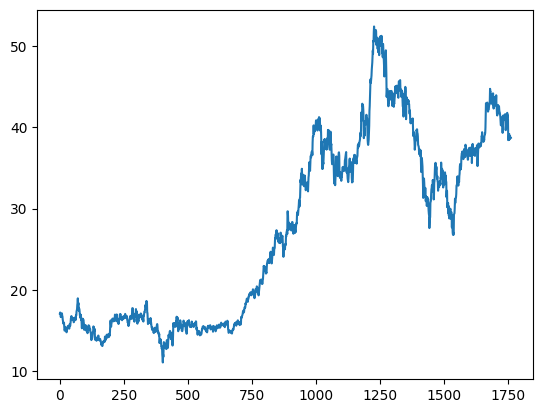

In [10]:
plt.plot(yahoo_stock_prices)
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
yahoo_stock_prices = scaler.fit_transform(yahoo_stock_prices)

In [12]:
xtrain = yahoo_stock_prices[:1411]
xtest = yahoo_stock_prices[1411:]


In [13]:
print(len(xtrain))
print(len(xtest))

1411
351


In [14]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [15]:
look_back = 1
trainX, trainY = create_dataset(xtrain, look_back)
testX, testY = create_dataset(xtest, look_back)


In [16]:
trainX.shape[0]

1409

In [17]:
trainX = np.reshape(trainX, trainX.shape)
testX = np.reshape(testX, testX.shape)

In [198]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout,LSTM
import time

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(trainX.shape[1], 1)))
model.add(Dropout(0.15))

model.add(LSTM(
    100,
    return_sequences=True))
model.add(Dropout(0.15))

model.add(LSTM(
    69,
    return_sequences=False))
model.add(Dropout(0.15))

model.add(Dense(units=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])
print ('compilation time : ', time.time() - start)

compilation time :  0.008299589157104492


In [199]:

history = model.fit(
    trainX,
    trainY,
    batch_size=70,
    epochs=10,
    validation_split=0.05)

Epoch 1/10
20/20 [==============================] - 7s 72ms/step - loss: 0.1401 - accuracy: 7.4738e-04 - val_loss: 0.3414 - val_accuracy: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 0s 10ms/step - loss: 0.0879 - accuracy: 7.4738e-04 - val_loss: 0.1839 - val_accuracy: 0.0000e+00
Epoch 3/10
20/20 [==============================] - 0s 10ms/step - loss: 0.0669 - accuracy: 7.4738e-04 - val_loss: 0.1474 - val_accuracy: 0.0000e+00
Epoch 4/10
20/20 [==============================] - 0s 10ms/step - loss: 0.0619 - accuracy: 7.4738e-04 - val_loss: 0.1271 - val_accuracy: 0.0000e+00
Epoch 5/10
20/20 [==============================] - 0s 9ms/step - loss: 0.0534 - accuracy: 7.4738e-04 - val_loss: 0.0901 - val_accuracy: 0.0000e+00
Epoch 6/10
20/20 [==============================] - 0s 9ms/step - loss: 0.0400 - accuracy: 7.4738e-04 - val_loss: 0.0378 - val_accuracy: 0.0000e+00
Epoch 7/10
20/20 [==============================] - 0s 9ms/step - loss: 0.0222 - accuracy: 7.4738e-04 - val_

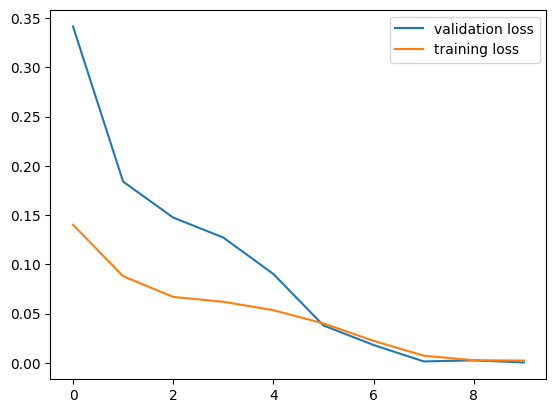

In [200]:
plt.plot(history.history['val_loss'], label="validation loss")
plt.plot(history.history['loss'], label="training loss")
plt.legend()
plt.show()

In [201]:
predicted = model.predict(testX)

11/11 [==============================] - 1s 3ms/step


In [202]:
new_test = testY.reshape(349,)

In [203]:
predicted_reshaped = predicted.reshape(349,)

In [204]:
print(predicted_reshaped[:5])
print(new_test[:5])

[0.5647028  0.59942377 0.6068873  0.60351706 0.5936426 ]
[0.60174423 0.60925394 0.6058624  0.5959302  0.58381784]


In [205]:
print(new_test.shape)
print(predicted_reshaped.shape)

(349,)
(349,)


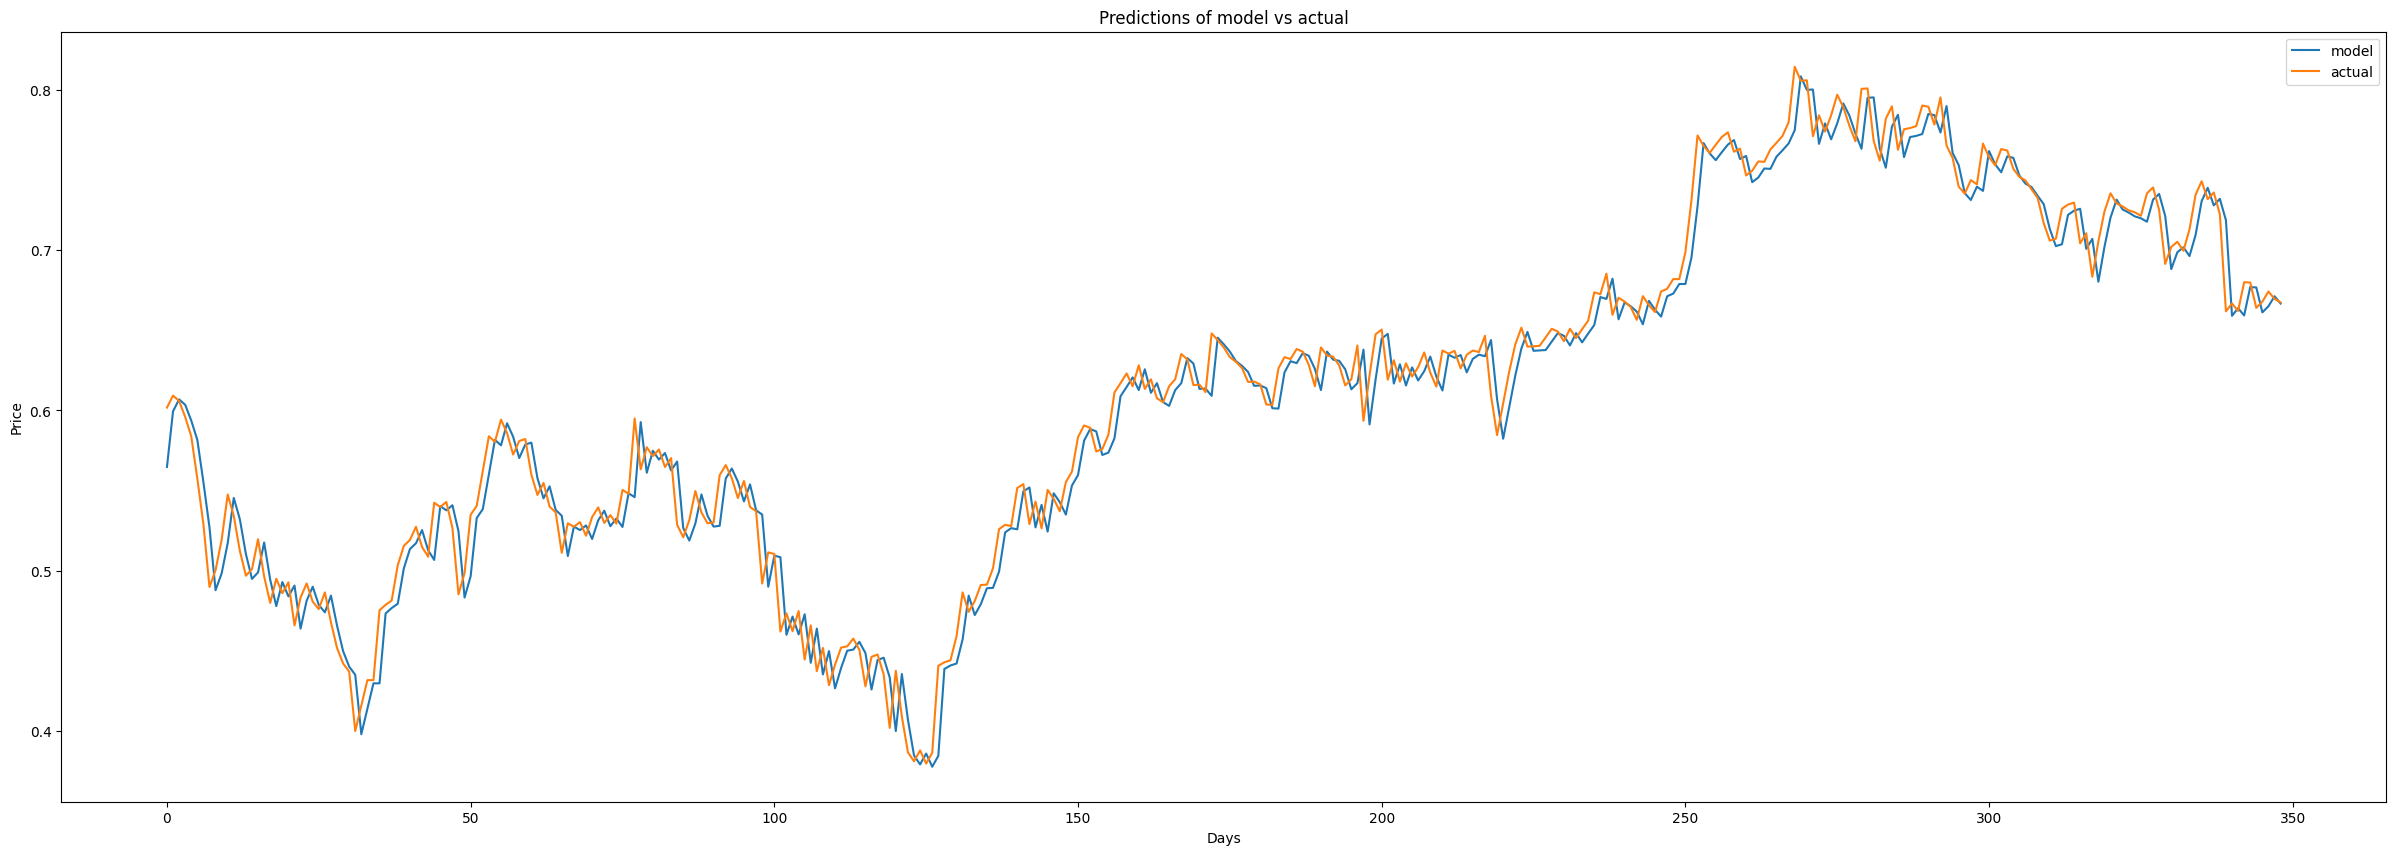

In [206]:
plt.figure(figsize=(30, 10))
plt.plot(predicted_reshaped, label='model')
plt.plot(new_test, label='actual')
plt.title("Predictions of model vs actual")
plt.xlabel('Days')
plt.ylabel("Price")
plt.legend()
plt.show()